# Project For ML

### Importing libraries

In [51]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, accuracy_score

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC


### Loading dataset & Data Exploration

In [3]:
data=pd.read_csv('heart.csv')

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
pd.isnull(data).any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Data is clear!


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Prepocessing

In [8]:
data['Sex'] = preprocessing.LabelEncoder().fit_transform(data['Sex'])
data['ChestPainType'] = preprocessing.LabelEncoder().fit_transform(data['ChestPainType'])
data['RestingECG'] = preprocessing.LabelEncoder().fit_transform(data['RestingECG'])
data['ExerciseAngina'] = preprocessing.LabelEncoder().fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = preprocessing.LabelEncoder().fit_transform(data['ST_Slope'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [9]:
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# mms = MinMaxScaler() # Normalization
# ss = StandardScaler() # Standardization

# data['Oldpeak'] = mms.fit_transform(data[['Oldpeak']])
# data['Age'] = ss.fit_transform(data[['Age']])
# data['RestingBP'] = ss.fit_transform(data[['RestingBP']])
# data['Cholesterol'] = ss.fit_transform(data[['Cholesterol']])
# data['MaxHR'] = ss.fit_transform(data[['MaxHR']])

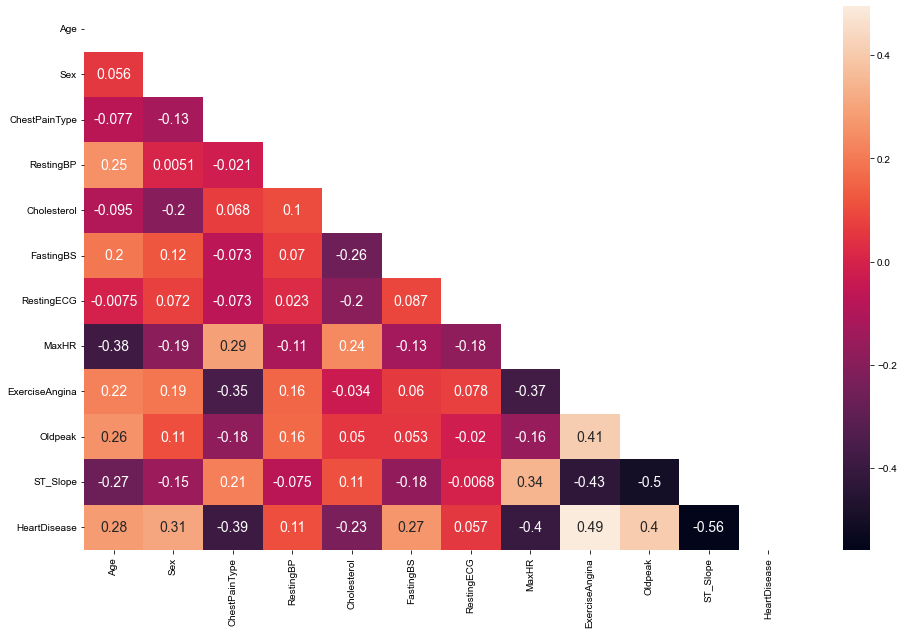

In [10]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, mask= mask, annot_kws={"size": 14})
sns.set_style('white')

Encoding is needed to make categorical values readable by the model

In [50]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


ChestPainType: 0 - ASY ;  1 - ATA;  2 - NAP;  3 - TA 

ASY = Asymptomatic

NAP = Non Anginal pain

ATA = Atypical Angina

TA = Typical Angina

Sex: 0 - Female, 1 - Male

RestingECG: 0 - LVH, 1 - Normal ,2 - ST

ExerciseAngina: 0- No 1-Yes

ST_Slope: 0-Down 1-Flat 2-UP

HeartDisease : 0- No, 1- Yes

### Since we have only two classes we are dealing with the binary classification problem

In [12]:
y = data["HeartDisease"]
X = data.drop(["HeartDisease","RestingBP","RestingECG"],axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')


X_train_shape: (734, 9)
X_test_shape: (184, 9)
y_train_shape: (734,)
y_test_shape: (184,)



In [13]:
xg_model=XGBClassifier()
xg_model.fit(X_train,y_train)

[19:46:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
predictions= xg_model.predict(X_train)
percentage=xg_model.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= xg_model .predict(X_test)
train_percentage=xg_model.score(X_train,y_train)
test_percentage=xg_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("Testing confusion matrix")
print(res)
# check the accuracy on the training set
print(xg_model.score(X_train, y_train))
print(xg_model.score(X_test, y_test))
print(f"Train set:{len(X_train)}")
print(f"Train Accuracy={train_percentage*100}%")
print(f"Test set:{len(X_test)}")
print(f"Test Accuracy={test_percentage*100}%")

Training confusion matrix
[[328   0]
 [  0 406]]
Testing confusion matrix
[[68 14]
 [17 85]]
1.0
0.8315217391304348
Train set:734
Train Accuracy=100.0%
Test set:184
Test Accuracy=83.15217391304348%


In [17]:
def model(classifier):

  classifier.fit(X_train,y_train)
  prediction = classifier.predict(X_test)
  prediction_tr = classifier.predict(X_train)
  cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
  print("Accuracy on train data: ",'{0:.2%}'.format(accuracy_score(y_train,prediction_tr)))
  print("Accuracy on test data: ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
  print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
  print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
  plot_roc_curve(classifier, X_test,y_test)
  plt.title('ROC_AUC_Plot')
  plt.show()

In [15]:
lr_model = LogisticRegression(solver="liblinear")


Accuracy on train data:  85.56%
Accuracy on test data:  89.13%
Cross Validation Score :  91.42%
ROC_AUC Score :  88.64%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


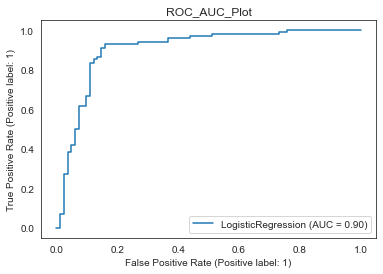

In [18]:
model(lr_model)

Accuracy on train data:  85.29%
Accuracy on test data:  88.59%
Cross Validation Score :  91.46%
ROC_AUC Score :  88.03%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


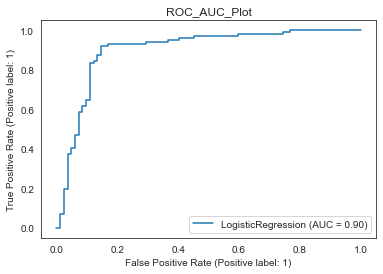

In [44]:
lr_model1 = LogisticRegression(solver="liblinear",penalty="l1")
model(lr_model1)

In [66]:
grids = {'min_samples_leaf': [1, 2, 5, 10],
         'n_estimators': [10,50,100],
         'max_depth': [2, 5, 10]}
           
randf = RandomForestClassifier()
gscv = GridSearchCV(randf, grids, scoring= 'accuracy')
score_best_estimator = gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest accuracy score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is:\ {}'.format(gscv.best_params_))


the highest accuracy score is: 0.862
the best hyperparameter combination is:\ {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}


Accuracy on train data:  89.24%
Accuracy on test data:  87.50%
Cross Validation Score :  93.05%
ROC_AUC Score :  86.93%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


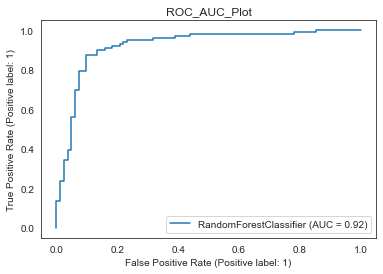

In [67]:
rf = RandomForestClassifier(max_depth=5, n_estimators=50, min_samples_leaf=5, random_state=0)
model(rf)

Accuracy on train data:  72.89%
Accuracy on test data:  71.74%
Cross Validation Score :  78.03%
ROC_AUC Score :  71.16%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


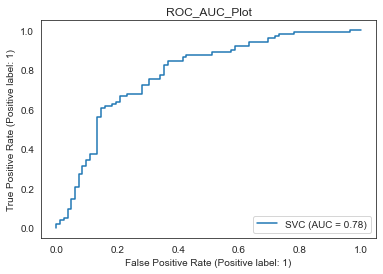

In [21]:
svc=SVC() 
model(svc)

Accuracy on train data:  81.47%
Accuracy on test data:  71.20%
Cross Validation Score :  75.27%
ROC_AUC Score :  70.79%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


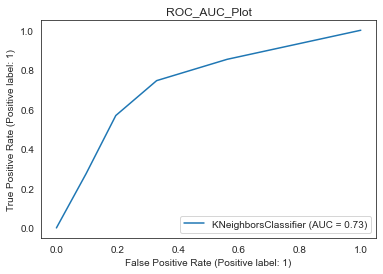

In [22]:
knn =KNN()
model(knn)

Accuracy on train data:  88.28%
Accuracy on test data:  89.67%
Cross Validation Score :  89.85%
ROC_AUC Score :  89.73%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


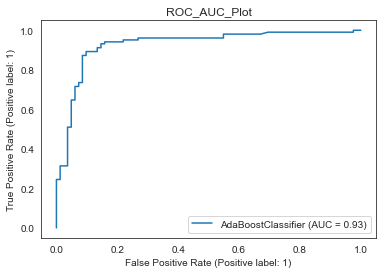

In [52]:
adaboost = AdaBoostClassifier()
model(adaboost)

In [62]:
gboost = GradientBoostingClassifier()
params = {'learning_rate':[0.1,0.01,0.2,0.5],
         'n_estimators':[100,200,150],
         'min_samples_split':[2,3,5],
         'min_samples_leaf':[1,2,5,10]}

gscv = GridSearchCV(gboost,params,cv=10,n_jobs=-1)
score_best_estimator = gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest accuracy score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is:\ {}'.format(gscv.best_params_))


the highest accuracy score is: 0.865
the best hyperparameter combination is:\ {'learning_rate': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy on train data:  87.19%
Accuracy on test data:  84.24%
Cross Validation Score :  92.67%
ROC_AUC Score :  83.51%


/Users/sergekhvan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


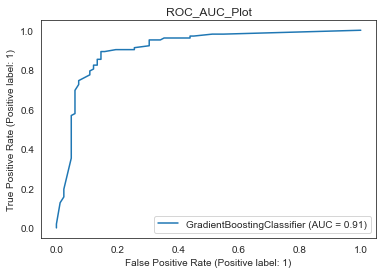

In [63]:
gboost1 = GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=5, min_samples_split=2, n_estimators=100)
model(gboost1)

## Visualising Data - Histograms, Distributions and Bar Charts
